# Table

In [1]:
import os
import cv2
import pandas as pd
from paddleocr import PPStructure,save_structure_res

In [2]:
table_engine = PPStructure(layout=False, show_log=True)
save_folder = './output'
img_path = 'pierre_test/bibibop/bibibop-1.png'
img = cv2.imread(img_path)

[2022/10/13 10:07:29] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/Users/pwinter/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='SVTR_LCNet', rec_model_dir='/Users/pwinter/.paddleocr/whl/rec/ch/ch_PP-OCRv3_rec_infer', rec_image_shape='3, 48, 320', rec_batch_num=6, max

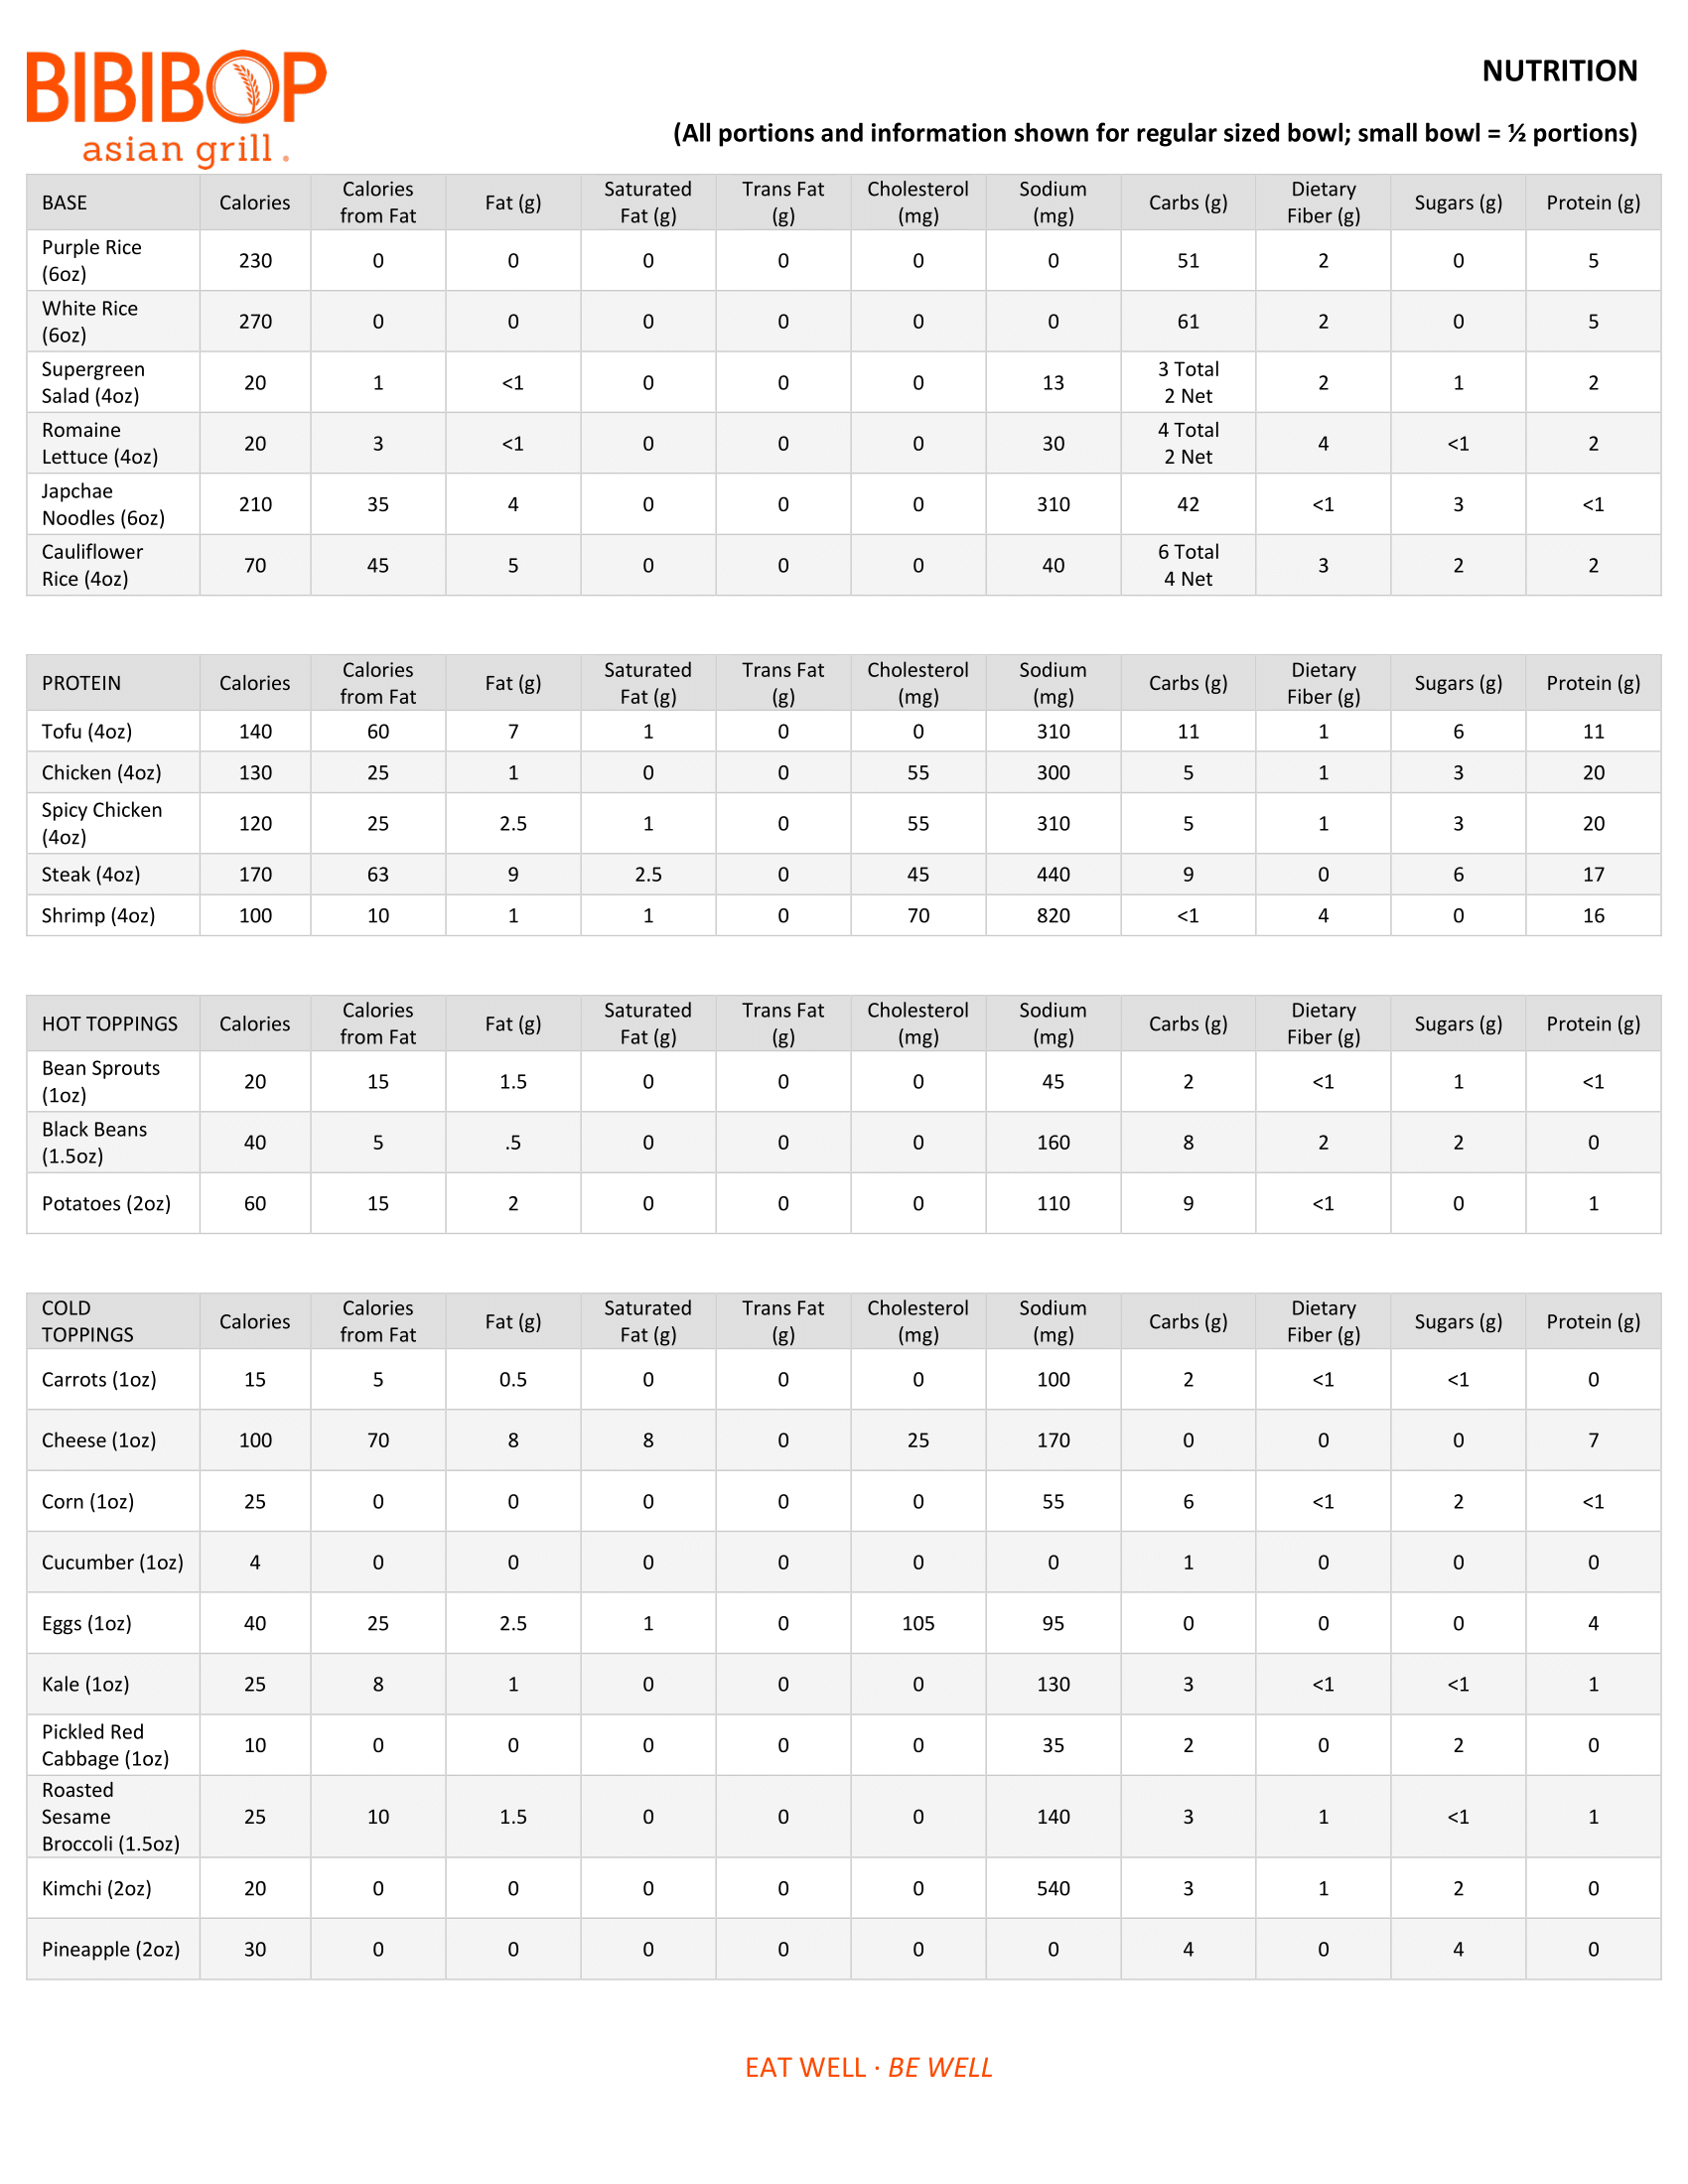

In [3]:
from IPython.display import Image
Image(filename=img_path)

In [4]:
img.shape

(2200, 1700, 3)

In [5]:
result = table_engine(img)

[2022/10/13 10:07:31] ppocr DEBUG: dt_boxes num : 381, elapse : 0.5129561424255371
[2022/10/13 10:08:02] ppocr DEBUG: rec_res num  : 381, elapse : 30.297215938568115


In [6]:
result[0].keys()

dict_keys(['type', 'bbox', 'img', 'res', 'img_idx'])

In [7]:
save_structure_res(result, save_folder, os.path.basename(img_path).split('.')[0])

In [8]:
# for line in result:
#     line.pop('img')
#     # print(line)

In [9]:
# import sys
# !{sys.executable} -m pip install tablepyxl

In [10]:
# import tablepyxl

In [11]:
# htmltext = result[0]['res']['html']
# excel_path = './output/test.xls'

In [12]:
# tablepyxl.tablepyxl.document_to_xl(htmltext, excel_path)

In [13]:
df = pd.read_excel('output/bibibop-1/test.xlsx', skiprows=1, engine='openpyxl')
# df = pd.read_excel('output/test.xls', skiprows=1, engine='openpyxl')
df

FileNotFoundError: [Errno 2] No such file or directory: 'output/bibibop-1/test.xlsx'

# Layout Recovery

In [ ]:
from paddleocr.ppstructure.recovery.recovery_to_doc import sorted_layout_boxes, convert_info_docx

In [ ]:
table_engine = PPStructure(recovery=True, lang='en')
save_folder = './output'
img_path = 'docs/table/1.png'
img = cv2.imread(img_path)

In [ ]:
result = table_engine(img)
save_structure_res(result, save_folder, os.path.basename(img_path).split('.')[0])

In [ ]:
for line in result:
    line.pop('img')
    print(line)

In [ ]:
h, w, _ = img.shape
res = sorted_layout_boxes(result, w)
convert_info_docx(img, res, save_folder, os.path.basename(img_path).split('.')[0])